# Penguin Measurement Analyses and Prediction using Machine Learning

Gurdeep Panag (30101520)

Harjot Dhaliwal (30051859)

Lukas Escoda (30211208)

Shabbir Khandwala (30219011)

University of Calgary

DATA 606: Statistical Methods in Data Science

Instructor: Dr. Greenberg

Feb 19, 2024

### Introduction

In the vast and dynamic ecosystem of Antarctica, penguins emerge not only as key species but also as fascinating subjects of scientific study. Understanding their life patterns, physical adaptations, and population dynamics is essential to unraveling the mysteries of these resilient beings and their interactions with the environment. This report focuses on exhaustive statistical analysis of a detailed dataset of penguins, encompassing multiple species and diverse physical and biological measurements. Through advanced statistical techniques, including various types of sampling and statistical techniques, we aim to unravel the complex interactions between the physical characteristics of the penguins, their environmental context, and species. This research not only seeks to contribute to the existing academic body on Antarctic wildlife but also to highlight the importance of applying rigorous statistical methods to better understand the animal. With meticulous analysis, our goal is to provide insights that are fundamental for the conservation and management of this animal, emphasizing how data science and statistical techniques can be powerful tools in understanding biodiversity and various animal species. This report is a step towards the profound exploration of the secrets that penguins have guarded for millennia, opening new avenues for research and appreciation of these emblematic creatures. Through some exploratory research, we have identified that the only categorical factors that would likely influence the physical and biological measurements of penguins would be the species (Animal Corner, 2023) and sex of the penguin (Horvath A., 2024). Through this research we have identified the best sampling method to choose would be stratified sampling based on the species of penguin, as we believe this has the largest impact on the measurements.

### Dataset

This dataset is from Kaggle and was sourced from the original public Github page (Amy, 2024). It can be used according to the MIT license which means we have the rights to use, copy, modify, merge, publish, distribute, sublicense, and/or sell copies of the dataset without limitation (Amy, 2024).

<table border="1">
  <tr>
    <th>Column Name</th>
    <th>Description</th>
  </tr>
  <tr>
    <td>Species</td>
    <td>Species of the penguin</td>
  </tr>
  <tr>
    <td>Island</td>
    <td>Island the penguin belongs to</td>
  </tr>
  <tr>
    <td>Culmen_length_mm</td>
    <td>Length of the penguin's culmen (bill)</td>
  </tr>
  <tr>
    <td>Culmen_depth_mm</td>
    <td>Depth of the penguin's culmen (bill)</td>
  </tr>
  <tr>
    <td>Flipper_length_mm</td>
    <td>Flipper length of the penguin</td>
  </tr>
  <tr>
    <td>Body_mass_g</td>
    <td>Body mass of the penguin</td>
  </tr>
  <tr>
    <td>Sex</td>
    <td>Sex of the penguin</td>
  </tr>
</table>

Table 1: Column Descriptions

In [126]:
# importing packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import scipy.stats as stats
import seaborn as sns
from sklearn.preprocessing import OneHotEncoder
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix, mean_squared_error, accuracy_score

In [127]:
# setting the random number generator seed
random_seed = 5

# setting the sample size
sample_size = 50

# setting the confidence level
conf_level = 0.95

In [128]:
# importing raw dataset
penguins = pd.read_csv("penguins_size.csv")
penguins.head()

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE


### Data Cleaning

In [129]:
# checking for the percentage of missing values in each column
np.round(penguins.isna().sum()/len(penguins),4)

species              0.0000
island               0.0000
culmen_length_mm     0.0058
culmen_depth_mm      0.0058
flipper_length_mm    0.0058
body_mass_g          0.0058
sex                  0.0291
dtype: float64

In [130]:
# dropping all rows with at least one missing value
penguins.dropna(axis = 0, inplace = True)
# checking datatypes of dataset columns
penguins.dtypes

species               object
island                object
culmen_length_mm     float64
culmen_depth_mm      float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

No columns had a concerning number of missing values, therefore we will not drop any columns, and instead drop individual rows.

In [131]:
# checking for unique values in all object columns
for column in penguins.select_dtypes("object").columns:
    print(penguins[column].unique())

['Adelie' 'Chinstrap' 'Gentoo']
['Torgersen' 'Biscoe' 'Dream']
['MALE' 'FEMALE' '.']


In [132]:
# removing all rows where the sex is a period
penguins = penguins[penguins.sex != "."]
# resetting and removing the index column
penguins.reset_index(drop = True, inplace = True)

display(penguins.head())

,species,island,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
4,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE


### Stratified Sampling

Our first objective would be to check to see if stratified sampling, stratifying on penguin species (50 samples) is a good estimator of the actual population mean of the body mass of penguins. The sampling phase plays a crucial role in our analysis to provide a good estimator. This allows us to gain a deeper understanding of the penguin population and its characteristics.

In [133]:
# To restore the results from the estimations to be done
results = {}

In [134]:
rng = np.random.default_rng(random_seed)

# conducting stratified sampling by species for 50 penguins
sample = penguins.groupby(by = "species").sample(frac = sample_size / len(penguins), random_state = rng)

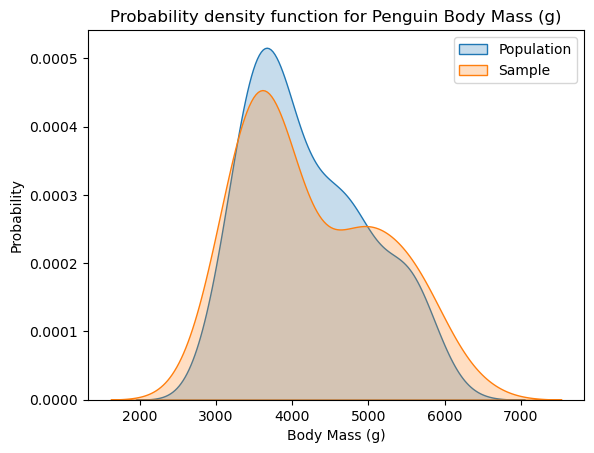

In [135]:
# plotting the density plots for body mass for both the sample and population
sns.kdeplot(penguins.body_mass_g, label = "Population", fill = True)
sns.kdeplot(sample.body_mass_g, label = "Sample", fill = True)
plt.xlabel("Body Mass (g)")
plt.ylabel("Probability")
plt.title("Probability density function for Penguin Body Mass (g)")
plt.legend()

plt.show()

Let $I_h$ be a sample of size $n_h$ drawn from $U_h$. We estimate $\mu_h$ and $t_h$ by
$$
\bar{y}_h = \frac1{n_h}\sum_{i\in I_h}y_i,\qquad\text{and}\qquad \hat{t}_h = N_h\bar{y}_h,
$$
respectively.

$h$ = $h$th stratum

We use
$$
\hat{t} = \sum_{h<H}\hat{t}_h=\sum_{h < H}N_h\bar{y}_h\qquad\text{and}\qquad \bar{y} = \frac{\hat{t}}N = \sum_{h<H}\frac{N_h}N\bar{y}_h
$$
as estimators of $t$ and $\mu$, repspectively.

To estimate these quantities, we use the sample variances

$$
s_h^2 = \frac1{n_h-1}\sum_{i\in I_h}(y_i - \bar{y}_h)^2
$$
in place of the population variances $S_h^2$. Thus,
$$
\widehat{\mathbb{V}}(\hat{t}) = \sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)N_h^2\frac{s_h^2}{n_h}
$$
and
$$
\widehat{\mathbb{V}}(\bar{y}) = \frac1{N^2}\sum_{h<H}\mathbb{V}(\hat{t}_h)
= \sum_{h<H}\left(1 - \frac{n_h}{N_h}\right)\left(\frac{N_h}{N}\right)^2\frac{s_h^2}{n_h}.
$$

Taking square roots yields standard errors:
$$
\widehat{\operatorname{SE}}(\bar{y})=\sqrt{\widehat{\mathbb{V}}(\bar{y})},\qquad
\widehat{\operatorname{SE}}(\hat{t})=\sqrt{\widehat{\mathbb{V}}(\hat{t})},\qquad
$$

In [136]:
# extracting the mean body mass for the sample
sample_mass_mean = sample.body_mass_g.mean()

# getting the counts and variances for the sample & population columns
sample_stats = sample.groupby("species").body_mass_g.agg(["count", "var"])
pop_stats = penguins.groupby("species").body_mass_g.agg(["count", "var"])

# renaming the columns
sample_stats.columns = ["sample_" + x for x in sample_stats.columns]
pop_stats.columns = ["pop_" + x for x in pop_stats.columns]

# calculating the variance with each stratum
strat_var = ((1 - sample_stats.sample_count / sample_size) ** 2) * sample_stats.sample_var / sample_stats.sample_count

# calculating the standard deviation of the sample
sample_std = np.sqrt(np.sum((pop_stats.pop_count / pop_stats.pop_count.sum()) ** 2 * strat_var))

In [137]:
# calculating the confidence interval range for the sample mean
conf_range = stats.t(sample_size - 1).ppf(1 - (1 - conf_level) / 2) * sample_std

# storing the results
results["Stratified Sampling"] = (sample_mass_mean, sample_mass_mean - conf_range, sample_mass_mean + conf_range)

print(f"95% Confidence Interval using Stratified Sampling: {sample_mass_mean - conf_range:.3f} - {sample_mass_mean + conf_range:.3f}")

95% Confidence Interval using Stratified Sampling: 4167.229 - 4330.771


### Ratio Estimation

Our second objective in this project is to see if any physical and biological measurements of penguins are highly correlated with one another, and if so, are we able to use ratio estimation to obtain estimates of the other variable, in order to simplify the data gathering process for future measurements. Once robust correlations between variables are identified, we expand our exploration by implementing a ratio estimator. This estimator enables us to predict the values of different numerical features, and evaluate the accuracy and feasibility of our predictions.

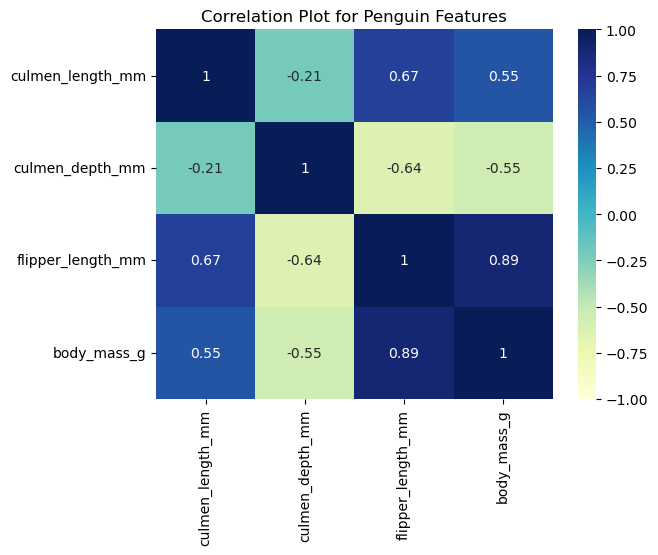

In [138]:
# plotting a correlation heatmap in order to see the correlations between columns
dataplot = sns.heatmap(sample[sample.select_dtypes("float64").columns].corr(), cmap = "YlGnBu", annot = True, vmin=-1, vmax=1)
plt.title("Correlation Plot for Penguin Features")
plt.show()

Approximate $B$ with samples of size $n$.

$$
\begin{aligned}
t_y = \sum_{i=1}^{N} y_i; \quad t_x = \sum_{i=1}^{N} x_i.\\
B = \frac{t_y}{t_x} = \frac{\bar{y}}{\bar{x}}.\\
\widehat{\mathbb{V}}(\widehat{B}) &=
\left(1 - \frac nN\right)\frac1{n\bar{x}_U^2}
\frac{\displaystyle\sum_{i\in I}(y_i - \widehat{B}x_i)^2}{n-1}\\
\widehat{\operatorname{SE}}(\widehat{B})&=
\sqrt{\widehat{\mathbb{V}}(\widehat{B})}
\end{aligned}
$$

In [139]:
# calculating the ratio estimator of body mass to flipper length
ratio_estimator = sample.body_mass_g.mean()/sample.flipper_length_mm.mean()

# calculating the variance within the error term
error_term_variance = np.sum(np.power(ratio_estimator * sample.flipper_length_mm - sample.body_mass_g, 2)/(sample_size - 1))

# calculating the standard deviation of the ratio estimator
ratio_std = np.sqrt((1 - sample_size / len(penguins)) * error_term_variance / (sample_size * sample.flipper_length_mm.mean() ** 2))

In [140]:
# estimating the sample mean
sample_mass_mean = ratio_estimator * sample.flipper_length_mm.mean()
# getting the confidence range/2
conf_range = stats.t(sample_size - 1).ppf(1 - (1 - conf_level) / 2) * ratio_std * sample.flipper_length_mm.mean()

# storing the results
results["Ratio Estimation"] = (sample_mass_mean, sample_mass_mean - conf_range, sample_mass_mean + conf_range)

print(f"95% Confidence Interval using Ratio Estimation: {sample_mass_mean - conf_range:.3f} - {sample_mass_mean + conf_range:.3f}")

95% Confidence Interval using Ratio Estimation: 4078.472 - 4419.528


### Bootstrapping to Estimate Penguin Body Mass

Our third goal is to run a bootstrapping simulation on a stratified sample of 50 penguins to determine the 95% confidence interval for estimating the average body mass of penguins. The point of bootstrapping simulations is to generate multiple resampled datasets from an existing dataset, allowing for the estimation of sampling variability and uncertainty in statistical analyses without additional data collection.

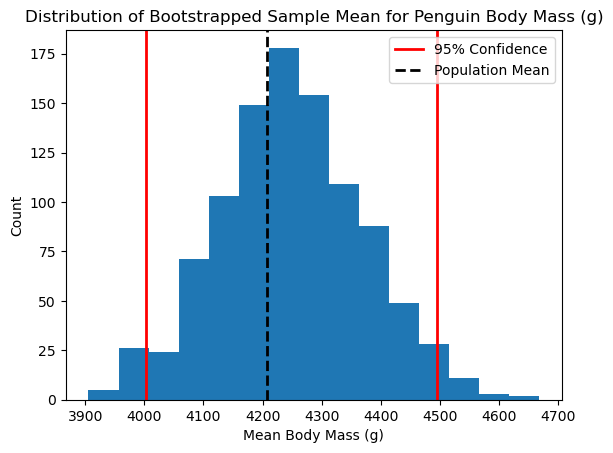

In [141]:
rng = np.random.default_rng(random_seed)

# iterating 1000 times
n_iter = 1000
# setting an empty matrix for the means of each sample
sample_means = np.zeros(n_iter)
# looping through 1000 times
for i in range(n_iter):
    # adding the mean body mass of the sample with replacement
    sample_means[i] = sample.body_mass_g.sample(n = sample_size, replace = True, random_state = rng).mean()

# plotting the histogram of body mass means
plt.hist(sample_means, bins = 15)

# setting the upper and lower limits of the confidence interval of bootstrapped means
lwr_limit = np.quantile(sample_means,  q = (1 - conf_level) / 2)
upr_limit = np.quantile(sample_means,  q = 1 - (1 - conf_level) / 2)
sample_mass_mean = np.quantile(sample_means,  q = 0.5)

# storing the results
results["Boostrapping"] = (sample_mass_mean, lwr_limit, upr_limit)

plt.axvline(x = lwr_limit, c = "red", linewidth = 2)
plt.axvline(x = upr_limit, c = "red", linewidth = 2, label = "95% Confidence")
plt.axvline(x = penguins.body_mass_g.mean(), c = "black", linestyle = "--", linewidth = 2, label = "Population Mean")
plt.legend()
plt.xlabel("Mean Body Mass (g)")
plt.ylabel("Count")
plt.title("Distribution of Bootstrapped Sample Mean for Penguin Body Mass (g)")

plt.show()

In [142]:
print(f"Bootstrapped 95% confidence interval: {lwr_limit:.3f} - {upr_limit:.3f}")

Bootstrapped 95% confidence interval: 4002.950 - 4495.587


Confidence Interval Visualizations

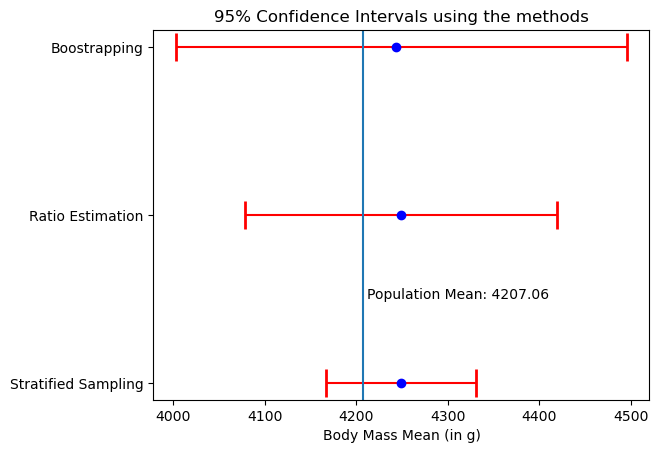

In [143]:
sample_mean_estimates = [value[0] for value in results.values()]
method_names = [key for key in results.keys()]
error_bars = np.array([np.array([value[0] - value[1], value[2] - value[0]]) for value in results.values()]).transpose()

plt.errorbar(y=method_names, x=sample_mean_estimates, xerr=error_bars, fmt='o', color='b', ecolor='red', capsize=10, capthick=2)
plt.axvline(x = penguins.body_mass_g.mean())
plt.text(penguins.body_mass_g.mean()*1.001, 0.5, f'Population Mean: {penguins.body_mass_g.mean():.2f}', rotation=0)
plt.xlabel("Body Mass Mean (in g)")
plt.title("95% Confidence Intervals using the methods")
plt.show()

### Data Wrangling

In [144]:
# conducting one hot encoding for object variables besides the label - species
columns_to_encode = list(penguins.select_dtypes("object").columns)
columns_to_encode.remove("species")

# applying one hot encoding
enc = OneHotEncoder(dtype = np.int8, drop="first").fit(penguins.loc[:, columns_to_encode])
encoded_columns = pd.DataFrame(enc.transform(penguins.loc[:, columns_to_encode]).toarray(), columns = enc.get_feature_names_out())
penguins = pd.concat([penguins, encoded_columns], axis = 1)
penguins.drop(columns = columns_to_encode, inplace = True)
display(penguins)

,species,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
0,Adelie,39.1,18.7,181.0,3750.0,0,1,1
1,Adelie,39.5,17.4,186.0,3800.0,0,1,0
2,Adelie,40.3,18.0,195.0,3250.0,0,1,0
3,Adelie,36.7,19.3,193.0,3450.0,0,1,0
4,Adelie,39.3,20.6,190.0,3650.0,0,1,1
...,...,...,...,...,...,...,...,...
328,Gentoo,47.2,13.7,214.0,4925.0,0,0,0
329,Gentoo,46.8,14.3,215.0,4850.0,0,0,0
330,Gentoo,50.4,15.7,222.0,5750.0,0,0,1
331,Gentoo,45.2,14.8,212.0,5200.0,0,0,0


### Splitting the Dataset

In [145]:
# splitting the dataset into testing and training batches
train_dataset, test_dataset = train_test_split(penguins, test_size = 0.2, random_state = random_seed)

### Naive Bayes to Predict Body Mass

Building on the previous investigations, we try to build a model that should be able to provide reasonable estimates using the rest of the features for the body mass (in g). In order to do so, we choose the Naive Bayes. In order to adhere to the conditions for its use, we train the model only considering the numerical & continuous variables.

In [146]:
# Create a Gaussian Naive Bayes model
model = GaussianNB()
# Extract continuous features from the training and testing datasets while excluding the target variable 'body_mass_g'
x_train, y_train = train_dataset.select_dtypes("float64").drop("body_mass_g", axis=1), train_dataset.body_mass_g
x_test, y_test = test_dataset.select_dtypes("float64").drop("body_mass_g", axis=1), test_dataset.body_mass_g
# Train the model using the training data
model.fit(x_train, y_train)
# Make predictions using the trained model on the testing data
predictions = model.predict(x_test)

errors = pd.DataFrame({"predicted": predictions, "actual": y_test, "error": predictions - y_test})
errors.sort_values(by=["predicted"], inplace=True)
errors.reset_index(drop=True, inplace=True)

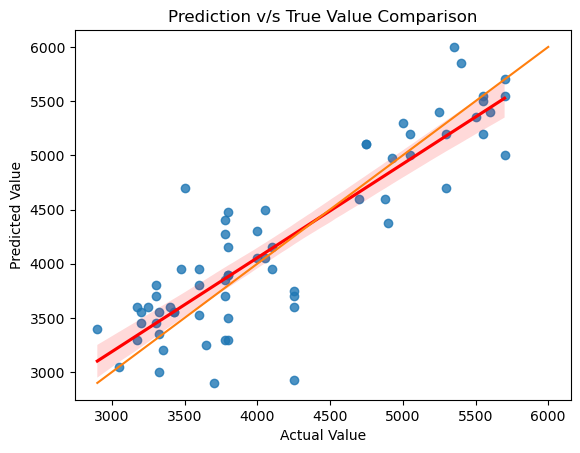

In [147]:
# checking goodness of fit of model
sns.regplot(x=errors.predicted, y=errors.actual, line_kws={"color":"red"})
sns.lineplot(x=errors.actual, y=errors.actual)
plt.xticks(ticks=range(3000, 6500, 500))
plt.yticks(ticks=range(3000, 6500, 500))
plt.xlabel("Actual Value")
plt.ylabel("Predicted Value")
plt.title("Prediction v/s True Value Comparison")
plt.show()

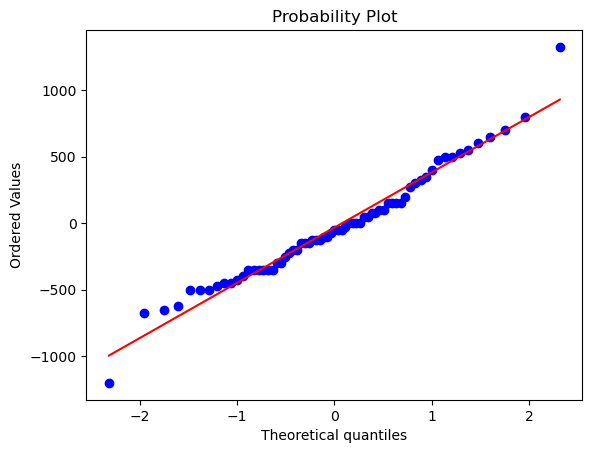

RMSE: 412.10
Actual Value would be 95% of times within the Predicted Value +- 807.69


In [148]:
# checking normality of residuals condition for GaussianNB
stats.probplot(errors.error, dist="norm", plot=plt)
plt.show()
rmse = mean_squared_error(y_test, predictions, squared=False)
print(f"RMSE: {rmse:.2f}")
print(f"Actual Value would be 95% of times within the Predicted Value +- {stats.norm.ppf(1 - (1 - conf_level)/2) * rmse:.2f}")

### Logistic Regression to Predict Penguin Species

Our last objective would be to create an accurate Logistic Regression algorithm (supervised machine learning) in order to predict the species of a penguin given various physical and biological measurements. We rigorously assess the accuracy of the model to ensure its reliability and effectiveness.

In [149]:
# initializing the logistic regression object
model = LogisticRegression(multi_class="ovr", max_iter=10000, fit_intercept=True)

# splitting the datasets into response and predictor variables
x_train, y_train = train_dataset.drop(columns = ["species"], axis = 1), train_dataset.species
x_test, y_test = test_dataset.drop(columns = ["species"], axis = 1), test_dataset.species

# Fitting the model
model.fit(x_train, y_train)

# predicting the model on the testing data
predictions = model.predict(x_test)

# getting the accuracy of the model on the testing dataset
accuracy = accuracy_score(y_test, predictions) * 100

print(f"Baseline Accuracy: {penguins.groupby('species').agg(['count']).max().max() / len(penguins) * 100:.2f}%")
print(f"Prediction Accuracy: {accuracy:.2f}%")

Baseline Accuracy: 43.84%
Prediction Accuracy: 97.01%


In [150]:
pd.DataFrame(confusion_matrix(predictions, y_test, labels=penguins.species.unique()), columns=penguins.species.unique(), index=penguins.species.unique())

,Adelie,Chinstrap,Gentoo
Adelie,30,2,0
Chinstrap,0,13,0
Gentoo,0,0,22


In [155]:
# checking the coefficients of the model
coefficients = pd.DataFrame(model.coef_, index = model.classes_, columns = model.feature_names_in_)
coefficients

,culmen_length_mm,culmen_depth_mm,flipper_length_mm,body_mass_g,island_Dream,island_Torgersen,sex_MALE
Adelie,-1.327010,1.533126,-0.098027,0.001652,-0.674601,0.966220,0.949858
Chinstrap,1.786692,0.218916,-0.022760,-0.011227,1.279143,-0.629128,-0.350985
Gentoo,-0.031758,-1.893951,0.040883,0.005546,-0.167998,-0.080352,-0.228385


### Discussion

After conducting our analysis, we have determined that organizing penguins by species is an effective method for collecting samples. This approach guarantees a diverse representation of various penguin types, enabling us to accurately reflect the entire penguin population. Our charts demonstrate a close alignment between the sample and the population, resulting in a reliable 95% confidence interval that captures the true average weight of the penguins.

In addition to species stratified sampling, we explored the use of ratio estimation to weigh penguins. We observed a strong correlation between a penguin's flipper length and body mass, providing an alternative method for estimating body mass. The confidence interval derived from this technique was slightly broader than that obtained from stratified sampling alone, indicating a lower level of precision.

By combining species stratified sampling with bootstrapping, our ability to predict body mass significantly improved. The distribution of averages obtained through bootstrapping was well-centered around the true average, with our confidence interval encompassing the actual average weight.

In terms of predicting penguin body mass, we developed a Gaussian Naive Bayes model focusing solely on numerical data. Unfortunately, the model's accuracy was subpar, resulting in a high root mean square error. This implies a considerable margin of error in predicted values, potentially reaching up to +/- 800, which is substantial given the typical range of penguin weights.

Conversely, our logistic regression model excelled in predicting penguin species based on physical and biological measurements. It exhibited an impressive 97.01% success rate, with coefficients revealing intriguing patterns such as the relationship between culmen length and penguin species. For instance, a longer culmen length may indicate a Chinstrap penguin, while a smaller culmen depth could suggest a Gentoo penguin.

### Conclusion

Our data science project utilized stratified sampling penguins by species as a powerful method for sample collection, ensuring a representative mix and yielding a reliable 95% confidence interval for average weight. We explored other methods as well such as ratio estimation, to obtain less restrictive confidence intervals. Gaussian Naive Bayes faced challenges in predicting body mass accurately, our logistic regression model excelled in species classification with a 97.01% success rate.

These findings emphasize the effectiveness of strategic sampling and the potential of machine learning models for accurate species identification, providing a foundation for further exploration and refinement in penguin population analysis.

### References

Amy. (2024). Penguin sizes dataset. Kaggle. https://www.kaggle.com/datasets/amulyas/penguin-size-dataset

Animal Corner. (2023). Penguin Size Comparison-How Big are Penguins? Animal Corner. https://animalcorner.org/blog/penguin-size-comparison/

Horvath A. (2024). How do Penguins find their mate in a sea of tuxedos? The University of Melbourne. https://pursuit.unimelb.edu.au/articles/how-do-penguins-find-their-mate-in-a-sea-of-tuxedos